In [17]:
# setting the graphic width and height for ggplot
library(repr)
options(repr.plot.width=6, repr.plot.height=4)

library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## as.Date()

In [1]:
# The date R 3.0.0 was released
x <- "2013-04-03"

# Examine structure of x
str(x)

# Use as.Date() to interpret x as a date
x_date <- as.Date(x)

# Examine structure of x_date
str(x_date)

# Store April 10 2014 as a Date
april_10_2014 <- as.Date("2014-04-10")

 chr "2013-04-03"
 Date[1:1], format: "2013-04-03"


## Automatic import

Sometimes you'll need to input a couple of dates by hand using as.Date() but it's much more common to have a column of dates in a data file.

Some functions that read in data will automatically recognize and parse dates in a variety of formats. In particular the import functions, like read_csv(), in the **readr** package will recognize dates in a few common formats.

There is also the anytime() function in the **anytime** package whose sole goal is to automatically parse strings as dates regardless of the format.

In [18]:
# Load the readr package
library(readr)

# Use read_csv() to import rversions.csv
releases <- read_csv("rversions.csv")

# Examine the structure of the date column
str(releases$date)

# Load the anytime package
library(anytime)

# Various ways of writing Sep 10 2009
sep_10_2009 <- c("September 10 2009", "2009-09-10", "10 Sep 2009", "09-10-2009")

# Use anytime() to parse sep_10_2009
anytime(sep_10_2009)

Parsed with column specification:
cols(
  major = col_integer(),
  minor = col_integer(),
  patch = col_integer(),
  date = col_date(format = ""),
  datetime = col_datetime(format = ""),
  time = col_time(format = ""),
  type = col_character()
)


 Date[1:105], format: "1997-12-04" "1997-12-21" "1998-01-10" "1998-03-14" "1998-05-02" ...


[1] "2009-09-10 01:00:00 BST" "2009-09-10 01:00:00 BST"
[3] "2009-09-10 01:00:00 BST" "2009-09-10 01:00:00 BST"

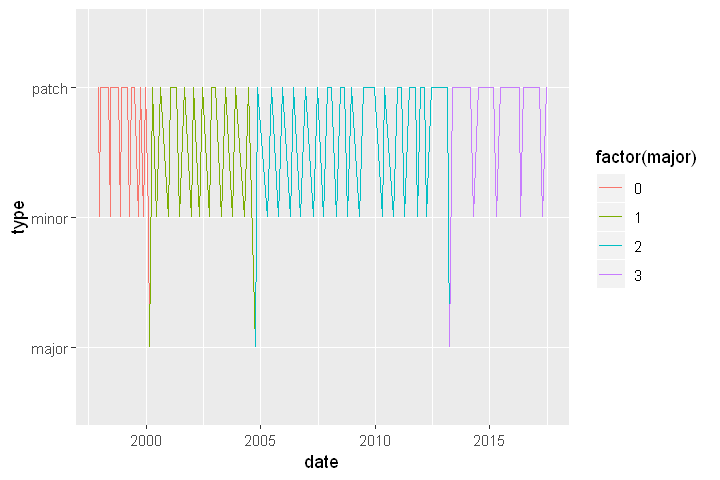

In [10]:
library(ggplot2)

# Set the x axis to the date column
ggplot(releases, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major)))

Warning message:
"Removed 87 rows containing missing values (geom_path)."

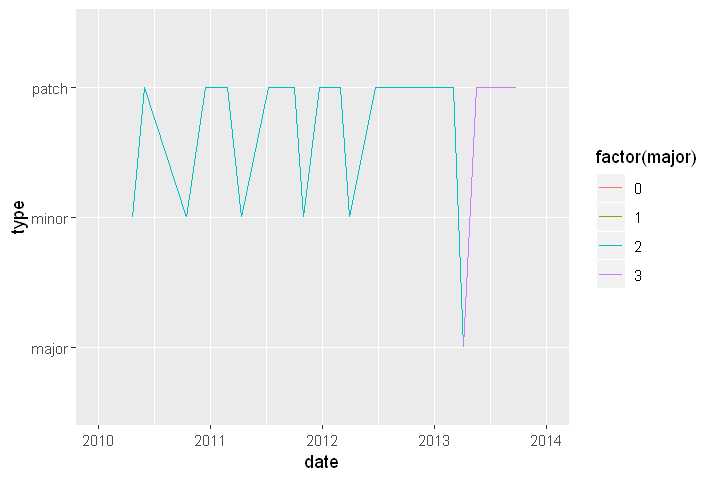

In [11]:
# Limit the axis to between 2010-01-01 and 2014-01-01
ggplot(releases, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major))) +
  xlim(as.Date("2010-01-01"), as.Date("2014-01-01"))

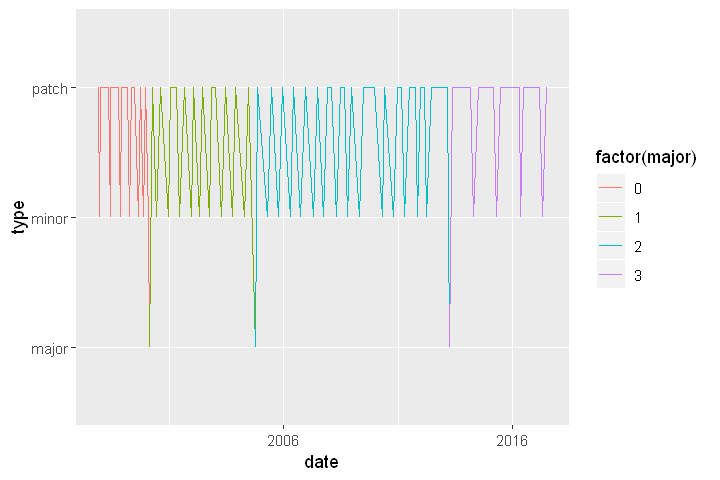

In [12]:
# Specify breaks every ten years and labels with "%Y"
ggplot(releases, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major))) +
  scale_x_date(date_breaks = "10 years", date_labels = "%Y")


## Sys.Date()
gives you the current date

In [19]:
# Find the largest date
last_release_date <- max(releases$date)

# Filter row for last release
last_release <- filter(releases, date == last_release_date)

# Print last_release
last_release

# How long since last release?
Sys.Date() - last_release_date

major,minor,patch,date,datetime,time,type
3,4,1,2017-06-30,2017-06-30 07:04:11,07:04:11,patch


Time difference of 480 days

## Getting datetimes into R

Finding out in which timezone you live:

In [21]:
Sys.timezone()

[1] "Europe/London"

In [20]:
# Use as.POSIXct to enter the datetime 
as.POSIXct("2010-10-01 12:12:00")

# Use as.POSIXct again but set the timezone to `"America/Los_Angeles"`
as.POSIXct("2010-10-01 12:12:00", tz = "America/Los_Angeles")

# Use read_csv to import rversions.csv
releases <- read_csv("rversions.csv")

# Examine structure of datetime column
str(releases$datetime)

[1] "2010-10-01 12:12:00 BST"

[1] "2010-10-01 12:12:00 PDT"

Parsed with column specification:
cols(
  major = col_integer(),
  minor = col_integer(),
  patch = col_integer(),
  date = col_date(format = ""),
  datetime = col_datetime(format = ""),
  time = col_time(format = ""),
  type = col_character()
)


 POSIXct[1:105], format: "1997-12-04 08:47:58" "1997-12-21 13:09:22" "1998-01-10 00:31:55" ...


In [30]:
# Import "cran-logs_2015-04-17.csv" with read_csv()
logs <- read_csv("cran-logs_2015-04-17.csv")

# Print logs
head(logs)

# Store the release time as a POSIXct object
release_time <-as.POSIXct("2015-04-16 07:13:33", tz = "UTC")

# When is the first download of 3.2.0?
head(logs %>% 
  filter(datetime > release_time,
    r_version == "3.2.0"),1)

Parsed with column specification:
cols(
  datetime = col_datetime(format = ""),
  r_version = col_character(),
  country = col_character()
)


datetime,r_version,country
2015-04-16 22:40:19,3.1.3,CO
2015-04-16 09:11:04,3.1.3,GB
2015-04-16 17:12:37,3.1.3,DE
2015-04-18 12:34:43,3.2.0,GB
2015-04-16 04:49:18,3.1.3,PE
2015-04-16 06:40:44,3.1.3,TW


datetime,r_version,country
2015-04-18 12:34:43,3.2.0,GB


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


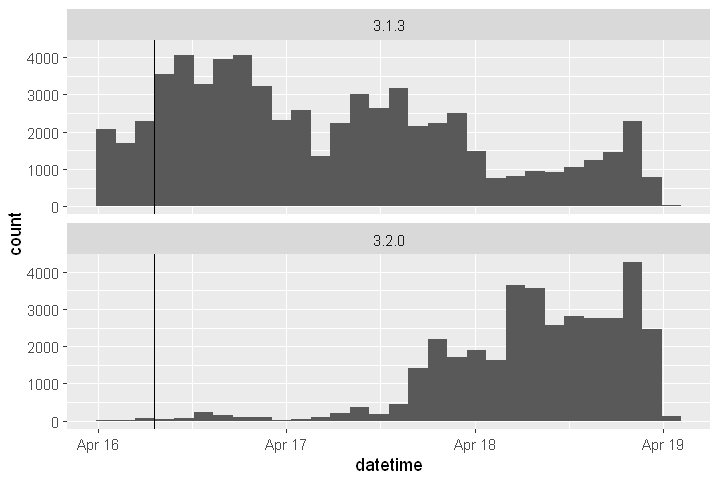

In [25]:
# Examine histograms of downloads by version
ggplot(logs, aes(x = datetime)) +
  geom_histogram() +
  geom_vline(aes(xintercept = as.numeric(release_time)))+
  facet_wrap(~ r_version, ncol = 1)

## lubridate

In [33]:
library(lubridate)

# Parse x 
x <- "2010 September 20th" # 2010-09-20
ymd(x)

# Parse y 
y <- "02.01.2010"  # 2010-01-02
dmy(y)

# Parse z 
z <- "Sep, 12th 2010 14:00"  # 2010-09-12T14:00
mdy_hm(z)

[1] "2010-09-20"

[1] "2010-01-02"

[1] "2010-09-12 14:00:00 UTC"

In [36]:
# Specify order to include both "mdy" and "dmy"
two_orders <- c("October 7, 2001", "October 13, 2002", "April 13, 2003", 
  "17 April 2005", "23 April 2017")
parse_date_time(two_orders, orders = c("mdy", "dmy"))

# Specify order to include "dOmY", "OmY" and "Y"
short_dates <- c("11 December 1282", "May 1372", "1253")
parse_date_time(short_dates, orders = c("dOmY", "OmY", "Y"))


[1] "2001-10-07 UTC" "2002-10-13 UTC" "2003-04-13 UTC" "2005-04-17 UTC"
[5] "2017-04-23 UTC"

[1] "1282-12-11 UTC" "1372-05-01 UTC" "1253-01-01 UTC"

In [38]:
library(lubridate)
library(readr)
library(dplyr)
library(ggplot2)

# Import CSV with read_csv()
akl_daily_raw <- read_csv("akl_weather_daily.csv")

# akl_daily_raw
glimpse(akl_daily_raw)

# Parse date 
akl_daily <- akl_daily_raw %>%
  mutate(date = ymd(date))

# akl_daily
glimpse(akl_daily)

Parsed with column specification:
cols(
  date = col_character(),
  max_temp = col_integer(),
  min_temp = col_integer(),
  mean_temp = col_integer(),
  mean_rh = col_integer(),
  events = col_character(),
  cloud_cover = col_integer()
)


Observations: 3,661
Variables: 7
$ date        <chr> "2007-9-1", "2007-9-2", "2007-9-3", "2007-9-4", "2007-9...
$ max_temp    <int> 60, 60, 57, 64, 53, 57, 59, 59, 55, 59, 57, 59, 62, 62,...
$ min_temp    <int> 51, 53, 51, 50, 48, 42, 41, 46, 50, 50, 50, 42, 44, 51,...
$ mean_temp   <int> 56, 56, 54, 57, 50, 50, 50, 52, 52, 54, 54, 50, 53, 56,...
$ mean_rh     <int> 75, 82, 78, 80, 90, 69, 77, 80, 88, 82, 78, 78, 77, 78,...
$ events      <chr> NA, "Rain", NA, "Rain", "Rain", NA, NA, NA, "Rain", "Ra...
$ cloud_cover <int> 4, 4, 6, 6, 7, 1, 4, 5, 7, 4, 3, 2, 4, 5, 4, 6, 4, 4, 4...
Observations: 3,661
Variables: 7
$ date        <date> 2007-09-01, 2007-09-02, 2007-09-03, 2007-09-04, 2007-0...
$ max_temp    <int> 60, 60, 57, 64, 53, 57, 59, 59, 55, 59, 57, 59, 62, 62,...
$ min_temp    <int> 51, 53, 51, 50, 48, 42, 41, 46, 50, 50, 50, 42, 44, 51,...
$ mean_temp   <int> 56, 56, 54, 57, 50, 50, 50, 52, 52, 54, 54, 50, 53, 56,...
$ mean_rh     <int> 75, 82, 78, 80, 90, 69, 77, 80, 88, 82, 78, 7

Warning message:
"Removed 1 rows containing missing values (geom_path)."

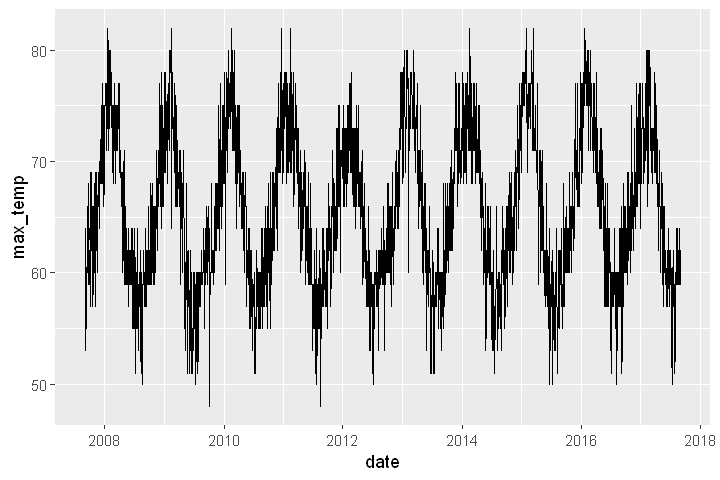

In [39]:
# Plot to check work
ggplot(akl_daily, aes(x = date, y = max_temp)) +
  geom_line() 

In [40]:
# Import "akl_weather_hourly_2016.csv"
akl_hourly_raw <- read_csv("akl_weather_hourly_2016.csv")

# Print akl_hourly_raw
head(akl_hourly_raw)

# Use make_date() to combine year, month and mday 
akl_hourly  <- akl_hourly_raw  %>% 
  mutate(date = make_date(year = year, month = month, day = mday))

# Parse datetime_string 
akl_hourly <- akl_hourly  %>% 
  mutate(
    datetime_string = paste(date, time, sep = "T"),
    datetime = ymd_hms(datetime_string)
  )

# Print date, time and datetime columns of akl_hourly
head(akl_hourly %>% select(date, time, datetime))


Parsed with column specification:
cols(
  year = col_integer(),
  month = col_integer(),
  mday = col_integer(),
  time = col_time(format = ""),
  temperature = col_double(),
  weather = col_character(),
  conditions = col_character(),
  events = col_character(),
  humidity = col_integer(),
  date_utc = col_datetime(format = "")
)


year,month,mday,time,temperature,weather,conditions,events,humidity,date_utc
2016,1,1,00:00:00,68,Clear,Clear,NA,68,2015-12-31 11:00:00
2016,1,1,00:30:00,68,Clear,Clear,NA,68,2015-12-31 11:30:00
2016,1,1,01:00:00,68,Clear,Clear,NA,73,2015-12-31 12:00:00
2016,1,1,01:30:00,68,Clear,Clear,NA,68,2015-12-31 12:30:00
2016,1,1,02:00:00,68,Clear,Clear,NA,68,2015-12-31 13:00:00
2016,1,1,02:30:00,68,Clear,Clear,NA,68,2015-12-31 13:30:00


date,time,datetime
2016-01-01,00:00:00,2016-01-01 00:00:00
2016-01-01,00:30:00,2016-01-01 00:30:00
2016-01-01,01:00:00,2016-01-01 01:00:00
2016-01-01,01:30:00,2016-01-01 01:30:00
2016-01-01,02:00:00,2016-01-01 02:00:00
2016-01-01,02:30:00,2016-01-01 02:30:00


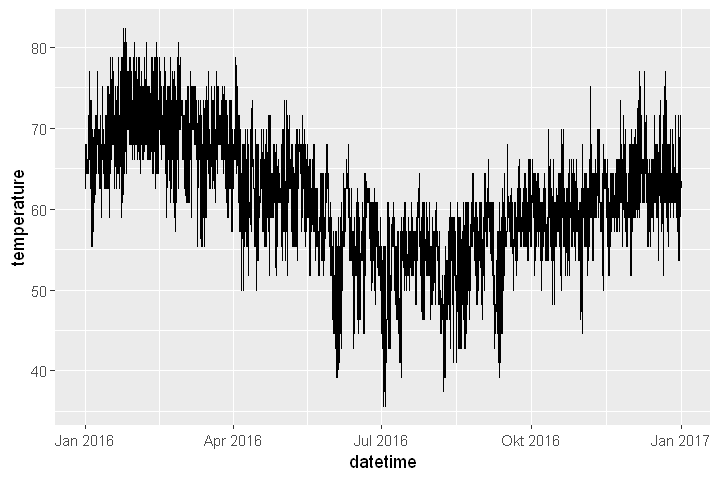

In [41]:
# Plot to check work
ggplot(akl_hourly, aes(x = datetime, y = temperature)) +
  geom_line()


In [45]:
library(ggplot2)

# Use wday() to tabulate release by day of the week
wday(releases$datetime) %>% table()

# Add label = TRUE to make table more readable
wday(releases$datetime, label = TRUE) %>% table()

# Create column wday to hold labelled week days
releases$wday <- wday(releases$datetime, label = TRUE)


.
 1  2  3  4  5  6  7 
 3 29  9 12 18 31  3 

.
So Mo Di Mi Do Fr Sa 
 3 29  9 12 18 31  3 

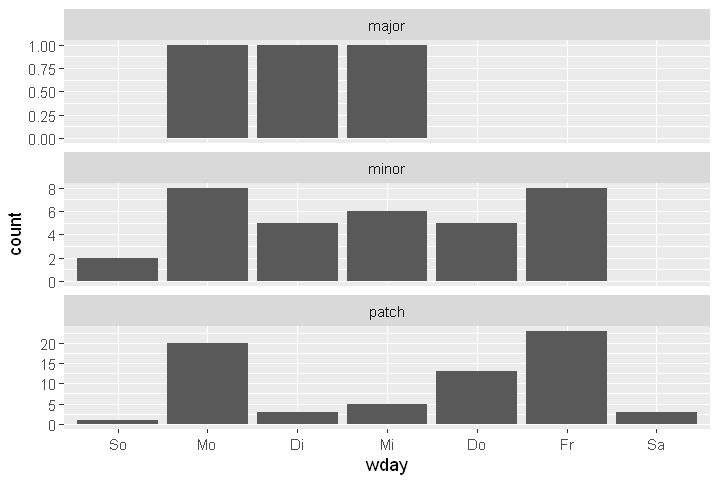

In [46]:
# Plot barchart of weekday by type of release
ggplot(releases, aes(x = wday)) +
  geom_bar() +
  facet_wrap(~ type, ncol = 1, scale = "free_y")

In [49]:
library(ggplot2)
library(dplyr)
library(ggridges)

# Add columns for year, yday and month
akl_daily <- akl_daily %>%
  mutate(
    year = year(date),
    yday = yday(date),
    month = month(date, label = TRUE))


Attaching package: 'ggridges'

The following object is masked from 'package:ggplot2':

    scale_discrete_manual



Warning message:
"Removed 1 rows containing missing values (geom_path)."

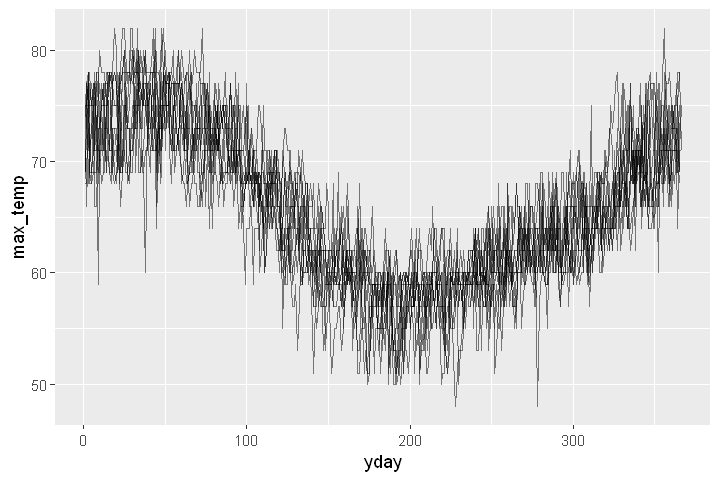

In [50]:
# Plot max_temp by yday for all years
ggplot(akl_daily, aes(x = yday, y = max_temp)) +
  geom_line(aes(group = year), alpha = 0.5)

Warning message:
"Removed 10 rows containing non-finite values (stat_density)."

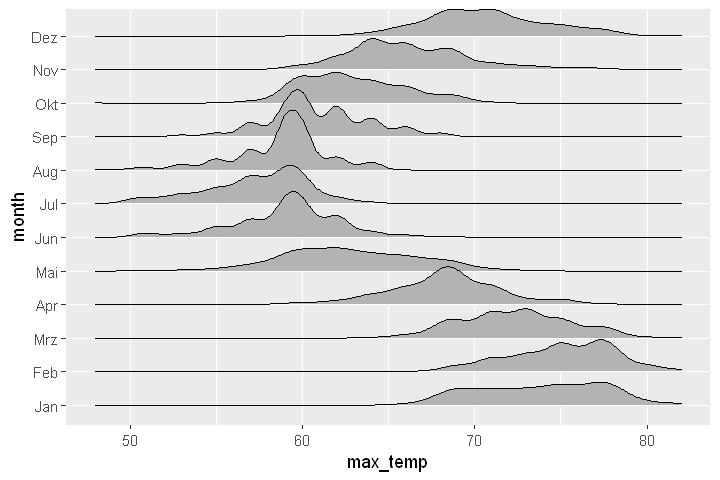

In [51]:
# Examine distribtion of max_temp by month
ggplot(akl_daily, aes(x = max_temp, y = month, height = ..density..)) +
  geom_density_ridges(stat = "density")

In [53]:
# Create new columns hour, month and rainy
akl_hourly <- akl_hourly %>%
  mutate(
    hour = hour(datetime),
    month = month(datetime, label = TRUE),
    rainy = weather == "Precipitation"
  )

# Filter for hours between 8am and 10pm (inclusive)
akl_day <- akl_hourly %>% 
  filter(hour >= 8, hour <= 22)

# Summarise for each date if there is any rain
rainy_days <- akl_day %>% 
  group_by(month, date) %>%
  summarise(
    any_rain = any(rainy)
  )

# Summarise for each month, the number of days with rain
rainy_days %>% 
  summarise(
    days_rainy = sum(any_rain)
  )

month,days_rainy
Jan,15
Feb,13
Mrz,12
Apr,15
Mai,21
Jun,19
Jul,22
Aug,16
Sep,25
Okt,20


## Practice rounding

As you saw in the video, round_date() rounds a date to the nearest value, floor_date() rounds down, and ceiling_date() rounds up.

All three take a unit argument which specifies the resolution of rounding. You can specify "second", "minute", "hour", "day", "week", "month", "bimonth", "quarter", "halfyear", or "year". Or, you can specify any multiple of those units, e.g. "5 years", "3 minutes" etc.

In [54]:
r_3_4_1 <- ymd_hms("2016-05-03 07:13:28 UTC")

# Round down to day
floor_date(r_3_4_1, unit = "day")

# Round to nearest 5 minutes
round_date(r_3_4_1, unit = "5 minutes")

# Round up to week 
ceiling_date(r_3_4_1, unit = "week")

# Subtract r_3_4_1 rounded down to day
r_3_4_1 - floor_date(r_3_4_1, unit = "day")

[1] "2016-05-03 UTC"

[1] "2016-05-03 07:15:00 UTC"

[1] "2016-05-08 UTC"

Time difference of 7.224444 hours

In [56]:
# Create day_hour, datetime rounded down to hour
akl_hourly <- akl_hourly %>%
  mutate(
    day_hour = floor_date(datetime, unit = "hour")
  )

# Count observations per hour  
head(akl_hourly %>% 
  count(day_hour))

# Find day_hours with n != 2 
head(akl_hourly %>% 
  count(day_hour) %>%
  filter(n != 2) %>% 
  arrange(desc(n)))

day_hour,n
2016-01-01 00:00:00,2
2016-01-01 01:00:00,2
2016-01-01 02:00:00,2
2016-01-01 03:00:00,2
2016-01-01 04:00:00,2
2016-01-01 05:00:00,2


day_hour,n
2016-04-03 02:00:00,4
2016-09-25 00:00:00,4
2016-06-26 09:00:00,1
2016-09-01 23:00:00,1
2016-09-02 01:00:00,1
2016-09-04 11:00:00,1
